In [1]:
import pandas as pd
import numpy as np
import string
import os

In [2]:
lan_data_path = 'languageID'
alphabets = list(string.ascii_lowercase + ' ')
data_train = []
data_test = []
split_idx = 9 #inclusive for training set
for file in os.listdir(lan_data_path):
    label = file[0]
    char_list = []
    i = int(file.split('.')[0][1:])
    print(file)
    with open(os.path.join(lan_data_path, file), 'r') as file:
        data = file.read()
        for j in alphabets:    
            char_list.append(data.count(j))
    char_list.append(label)
    if i <= split_idx:
        data_train.append(char_list)
    else:
        print(i)
        data_test.append(char_list)
df_train = pd.DataFrame(data=data_train, columns=alphabets[:-1]+['space', 'label'])
df_test = pd.DataFrame(data=data_test, columns=alphabets[:-1]+['space', 'label'])

e0.txt
e1.txt
e10.txt
10
e11.txt
11
e12.txt
12
e13.txt
13
e14.txt
14
e15.txt
15
e16.txt
16
e17.txt
17
e18.txt
18
e19.txt
19
e2.txt
e3.txt
e4.txt
e5.txt
e6.txt
e7.txt
e8.txt
e9.txt
j0.txt
j1.txt
j10.txt
10
j11.txt
11
j12.txt
12
j13.txt
13
j14.txt
14
j15.txt
15
j16.txt
16
j17.txt
17
j18.txt
18
j19.txt
19
j2.txt
j3.txt
j4.txt
j5.txt
j6.txt
j7.txt
j8.txt
j9.txt
s0.txt
s1.txt
s10.txt
10
s11.txt
11
s12.txt
12
s13.txt
13
s14.txt
14
s15.txt
15
s16.txt
16
s17.txt
17
s18.txt
18
s19.txt
19
s2.txt
s3.txt
s4.txt
s5.txt
s6.txt
s7.txt
s8.txt
s9.txt


In [112]:
labels = ['e', 'j', 's']
alpha = 0.5
K = len(alphabets)
probs = []
for i in labels:
    df_train_label = df_train[df_train['label'] == i].drop(['label'], axis=1)
    count_each = df_train_label.sum()
    count_sum = count_each.sum()
    prob_each:pd.DataFrame = (count_each+alpha)/(count_sum+alpha*K)
    probs.append(prob_each.to_numpy())


In [143]:
df_test

,a,b,c,d,e,f,g,h,i,j,...,s,t,u,v,w,x,y,z,space,label
0,164,32,53,57,311,55,51,140,140,3,...,186,225,65,31,47,4,38,2,498,e
1,199,47,70,86,352,78,47,143,170,1,...,194,272,86,35,57,2,43,2,618,e
2,122,23,59,36,196,35,15,89,103,0,...,124,194,58,15,24,3,25,0,348,e
3,97,24,25,32,173,38,23,85,87,0,...,94,179,49,8,29,2,28,1,299,e
4,113,24,33,32,164,38,33,87,87,2,...,109,140,36,9,23,1,19,1,322,e
5,108,19,34,42,157,31,29,67,101,0,...,96,149,38,16,29,0,23,1,271,e
6,159,36,66,60,316,45,35,138,138,0,...,169,219,56,27,46,7,32,0,477,e
7,155,26,62,53,267,58,41,110,128,3,...,145,200,55,22,30,2,30,1,416,e
8,126,16,31,37,166,32,21,57,98,0,...,105,118,46,15,24,3,23,1,302,e
9,31,8,14,17,59,12,8,20,49,0,...,37,44,17,7,5,1,4,0,97,e


In [125]:
#e10 needed to be located manually
bag_e10 = df_train.iloc[0].drop('label').to_numpy().astype('int')
bag_e10

array([ 67,   8,  28,  25, 142,  16,  12,  66,  61,   0,   9,  46,  25,
        75,  88,  17,   0,  72,  76, 100,  38,  13,  28,   0,  16,   1,
       236])

In [126]:
def pred_label(n:np.ndarray):
    max_label = 0
    max_value = float('-inf')
    for i in range(3):
        prob_label = 0
        log_probs = np.log(probs[i])
        for j in range(len(n)):
            prob_label = prob_label + n[j]*log_probs[j]
        if prob_label > max_value:
            max_label = labels[i]
            max_value = prob_label
    return max_label


In [140]:
predictions = []
true_labels = []
for i in range(len(df_test)):
    predictions.append(pred_label(df_test.iloc[i].drop('label')))
    true_labels.append(df_test.iloc[i].loc['label'])

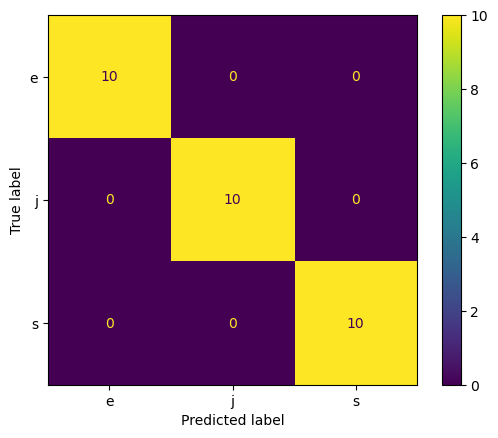

In [145]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


ConfusionMatrixDisplay.from_predictions(true_labels, predictions)
plt.savefig('confusion.pdf')
plt.show()

-3537.522363617156
-3920.947702122209
-3861.804840651324


In [103]:
import tabulate

# Create a sample list
columns = []
idx = 13
label_now = 2
for i in range(len(alphabets[:idx])):
    columns.append('$\theta_{'+str(i+1)+',e}$')
# Convert the list to a LaTeX table format
data = [alphabets, bag_e10[:idx]]
table = tabulate.tabulate(data, headers='firstrow', tablefmt='latex')

# # Print the LaTeX table
print(table)


# Create a sample list
columns = []
idx = 13
for i in range(len(alphabets[idx:])):
    columns.append('$\theta_{'+str(i+1)+',e}$')
# Convert the list to a LaTeX table format
data = [alphabets[idx:], bag_e10[idx:].round(3)]
table = tabulate.tabulate(data, headers='firstrow', tablefmt='latex')

# # Print the LaTeX table
print(table)

\begin{tabular}{rrrrrrrrrrrrr}
\hline
   a &   b &   c &   d &   e &   f &   g &   h &   i &   j &   k &   l &   m \\
\hline
  67 &   8 &  28 &  25 & 142 &  16 &  12 &  66 &  61 &   0 &   9 &  46 &  25 \\
\hline
\end{tabular}
\begin{tabular}{rrrrrrrrrrrrrr}
\hline
   n &   o &   p &   q &   r &   s &   t &   u &   v &   w &   x &   y &   z &     \\
\hline
  75 &  88 &  17 &   0 &  72 &  76 & 100 &  38 &  13 &  28 &   0 &  16 &   1 & 236 \\
\hline
\end{tabular}


In [90]:
import tabulate

# Create a sample list
columns = []
idx = 13
label_now = 2
for i in range(len(alphabets[:idx])):
    columns.append('$\theta_{'+str(i+1)+',e}$')
# Convert the list to a LaTeX table format
data = [alphabets, probs[label_now][:idx].round(3)]
table = tabulate.tabulate(data, headers='firstrow', tablefmt='latex')

# # Print the LaTeX table
print(table)


# Create a sample list
columns = []
idx = 13
for i in range(len(alphabets[idx:])):
    columns.append('$\theta_{'+str(i+1)+',e}$')
# Convert the list to a LaTeX table format
data = [alphabets[idx:], probs[label_now][idx:].round(3)]
table = tabulate.tabulate(data, headers='firstrow', tablefmt='latex')

# # Print the LaTeX table
print(table)

\begin{tabular}{rrrrrrrrrrrrr}
\hline
     a &     b &     c &    d &     e &     f &     g &     h &    i &     j &   k &     l &     m \\
\hline
 0.105 & 0.008 & 0.038 & 0.04 & 0.114 & 0.009 & 0.007 & 0.005 & 0.05 & 0.007 &   0 & 0.053 & 0.026 \\
\hline
\end{tabular}
\begin{tabular}{rrrrrrrrrrrrrr}
\hline
     n &     o &     p &     q &     r &     s &     t &     u &     v &   w &     x &     y &     z &       \\
\hline
 0.054 & 0.072 & 0.024 & 0.008 & 0.059 & 0.066 & 0.036 & 0.034 & 0.006 &   0 & 0.002 & 0.008 & 0.003 & 0.168 \\
\hline
\end{tabular}


\begin{tabular}{rrrrrrrrrrrrrr}
\hline
     n &     o &     p &     q &     r &     s &     t &     u &     v &   w &     x &     y &     z &       \\
\hline
 0.054 & 0.072 & 0.024 & 0.008 & 0.059 & 0.066 & 0.036 & 0.034 & 0.006 &   0 & 0.002 & 0.008 & 0.003 & 0.168 \\
\hline
\end{tabular}
